**Artificial Neural Network**


**TUGAS UTS KECERDASAN BUATAN**

Nama : Novi Yuningsih

NIM  : 09011281823133

Kelas: Sistem Komputer 5 B Indralaya

Sebelumnya datasets yang saya gunakan bersumber dari laman "Gender Recognition by Voice" https://www.kaggle.com/primaryobjects/voicegender

Sebelum kita menyelami izinkan saya memberikan gambaran singkat tentang apa yang sedang kita lakukan. Kami memiliki dataset yang berdasarkan parameter tertentu yang mengklasifikasikan suara berdasarkan jenis kelamin. Bagaimana manusia melakukannya?
> Gelombang suara merambat ke saluran telinga sampai mencapai gendang telinga. Gendang telinga meneruskan getaran melalui tulang telinga tengah atau osikel ke telinga bagian dalam. Telinga bagian dalam berbentuk seperti siput dan disebut juga koklea. Di dalam koklea, ada ribuan sel rambut kecil. Sel rambut mengubah getaran menjadi sinyal listrik yang dikirim ke otak melalui saraf pendengaran. Otak memberi tahu Anda bahwa Anda sedang mendengar suara dan suara apa itu.
>

Apa yang terjadi di otak adalah neuron melakukan operasi tertentu untuk mengklasifikasikan suara, inilah yang akan kita coba simulasikan. Kami akan mencoba meniru fungsinya (pada skala yang jauh * 1000 lebih kecil) hanya untuk mendapatkan ide dasarnya.


**Langkah Pertama**

Import library dasar 
matplotlib :: Untuk memplot grafik
    numpy  :: Untuk melakukan operasi dan memanipulasi array
    pandas :: Untuk membaca dan mengelola data dari file

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Langkah Kedua**

Kita perlu memisahkan variabel dependen dan independen. Di sini 20 set kolom pertama terdiri dari fitur dan kolom terakhir adalah variabel dependen, yang mengambil nilai string yaitu Pria dan Wanita
Dan berikut ini merupakan tampilan datasets nya.

In [2]:
dataset=pd.read_csv("D:/ANN/voice.csv")
X=dataset.iloc[:,0:20]
y=dataset.iloc[:,-1].values

**Langkah Ke-3**

Sekarang karena kita memiliki set fitur dan himpunan variabel dependen, Kami mengamati bahwa 'y' memiliki string dan dalam matematika kami membutuhkan nilai jadi yang akan kami lakukan adalah menyandikan Pria = 1 dan Wanita = 0, (ps I have nothing to lakukan dengan tugas ;-)). Jadi kita akan menggunakan kelas LabelEncoder dan membiarkannya melakukan tugasnya.

In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)


**Langkah Ke-4**

Sekarang jika kita mengamati nilai-nilai di berbagai kolom, kita melihat bahwa ada masalah baik nilainya sangat dekat dengan nol atau semua kolom memiliki skala yang tidak sama. Mengapa ada kebutuhan untuk Skala barang mungkin menjadi pertanyaan, Jawabannya adalah ada banyak kali di mana kita perlu menghitung kemiringan asumsikan dalam penyebut dua titik sangat dekat dengan nol, pengurangan akan membuatnya lebih dekat ke nol dan kemiringan mengasumsikan nilai yang luar biasa besar, jadi untuk mencegah sakit kepala semacam ini kami biasanya menggunakan penskalaan di Jaringan Neural.

In [4]:

from sklearn.preprocessing import StandardScaler
X_sc = StandardScaler()
X= X_sc.fit_transform(X)

**Langkah Ke-5**

Bagi data menjadi set pelatihan dan set pengujian, Satu set untuk melatih Jaringan saraf dan set lainnya untuk menguji jaringan saraf.

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


**Langkah Ke-6**

Sekarang mulailah permainan sebenarnya membangun jaringan saraf untuk ini, pertama-tama kita mengimpor perpustakaan yang diperlukan.

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
from keras.utils import plot_model
from keras.optimizers import SGD


Using TensorFlow backend.


Sebelum kita masuk ke kode, mari kita coba memahami struktur Neural Network yang ingin kita bangun. Apa hal pertama yang perlu kita lakukan jika kita ingin memahami atau menghancurkan suara apa pun? Sederhana kita perlu mendengar istilah coumputing perlu ada masukan. Di sini, di kumpulan data ada 20 parameter yang juga bisa disebut fitur dan ini diumpankan ke node pada basis satu-ke-satu yaitu satu node menerima satu input. Kita akan menyebutnya sebagai lapisan pertama dan inilah fungsi potongan kode ini.
> ** classifier.add (Dense (output_dim = 11, init = 'uniform', activation = 'relu', input_dim = 20)) **

selanjutnya kita meneruskan suara ini ke unit pemrosesan otak di mana kita memiliki banyak neuron pemrosesan menengah sebelum kita benar-benar mendapatkan hasilnya. Dalam hal ini kami hanya akan menambahkan 2 tahap menengah dari pemrosesan neuron dengan 11 node di setiap lapisan.
>

> ** classifier.add (Dense (output_dim = 11, init = 'uniform', activation = 'relu')) **


> ** classifier.add (Dense (output_dim = 6, init = 'uniform', activation = 'relu')) **

Sekarang kita perlu mendapatkan output dan satu node akan melakukan pekerjaan itu

> classifier.add (Dense (output_dim = 1, init = 'uniform', activation = 'sigmoid'))

Jika bertanya-tanya apa itu relu dan sigmoid dengan baik, ini adalah fungsi yang digunakan untuk menghitung bobot / kerugian, dll. Pertimbangkan untuk memeriksa apa kepanjangannya.

In [7]:
classifier=Sequential()
history = History()

#number of input variables =20
#first layer 
#input_dim is only for the first layer
classifier.add(Dense(output_dim=11,init='uniform',activation='relu',input_dim=20))
#first Hidden layer
classifier.add(Dense(output_dim=11,init='uniform',activation='relu'))
#Second Hidden
classifier.add(Dense(output_dim=6,init='uniform',activation='relu'))
#output layer
classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))
#Running the artificial neural network
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#fitting
classifier.fit(X_train,y_train,batch_size=10,epochs=10,validation_split=0.1,callbacks=[history],shuffle=2)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=20, units=11, kernel_initializer="uniform")`
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=11, kernel_initializer="uniform")`
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]


Train on 2280 samples, validate on 254 samples
Epoch 1/10
2280/2280 [==============================] - 1s 295us/step - loss: 0.5685 - acc: 0.7623 - val_loss: 0.3746 - val_acc: 0.8701
Epoch 2/10
2280/2280 [==============================] - 0s 199us/step - loss: 0.2280 - acc: 0.9202 - val_loss: 0.1637 - val_acc: 0.9370
Epoch 3/10
2280/2280 [==============================] - 0s 206us/step - loss: 0.0998 - acc: 0.9693 - val_loss: 0.1348 - val_acc: 0.9606
Epoch 4/10
2280/2280 [==============================] - 0s 204us/step - loss: 0.0823 - acc: 0.9759 - val_loss: 0.1374 - val_acc: 0.9567
Epoch 5/10
2280/2280 [==============================] - 0s 197us/step - loss: 0.0775 - acc: 0.9785 - val_loss: 0.1260 - val_acc: 0.9567
Epoch 6/10
2280/2280 [==============================] - 0s 198us/step - loss: 0.0741 - acc: 0.9811 - val_loss: 0.1336 - val_acc: 0.9646
Epoch 7/10
2280/2280 [==============================] - 0s 200us/step - loss: 0.0723 - acc: 0.9781 - val_loss: 0.1398 - val_acc: 0.9606
E

**Langkah Akhir **

Itu selalu penting untuk dilihat, apa yang sebenarnya terjadi dan bagaimana model itu belajar. Jadi dengan setiap zaman ada pembelajaran yang terjadi. Model ini mampu menghitung kerugian yang dihadapinya dari hasil aktual dan kemudian menyesuaikan bobotnya

Accuracy we are able to achieve with our ANN is 97.7917981073 %


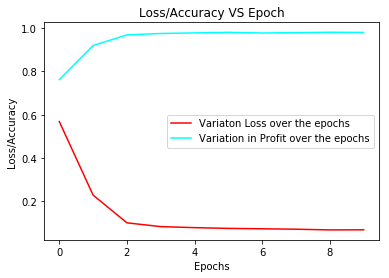

In [8]:

import sklearn.metrics as metrics
y_pred=classifier.predict(X_test)
y_pred = np.round(y_pred)

print('Accuracy we are able to achieve with our ANN is',metrics.accuracy_score(y_pred,y_test)*100,'%')

plt.plot(history.history['loss'], color = 'red',label='Variaton Loss over the epochs',)
plt.plot(history.history['acc'],color='cyan',label='Variation in Profit over the epochs')

plt.xlabel('Epochs')
plt.title('Loss/Accuracy VS Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='best')
plt.show()



Jika kita mengamati grafik, selama periode waktu jelas bahwa kerugian secara bertahap mencapai nol dan Akurasi meningkat pada tingkat yang cukup besar.

Dan juga dicapai tingkat akurasinya dengan sebesar 0.977917981073 atau 97.7917981073%.